In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from statsmodels.graphics.regressionplots import *
from statsmodels.graphics.gofplots import *
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

## Q8: Auto dataset

In [4]:
# import data
auto = pd.read_csv('data/auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
auto.info()
auto.horsepower = pd.to_numeric(auto.horsepower, errors='coerce').fillna(0).astype(np.int64)
auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### a. Perform a linear regression with mpg as response and horsepower as the predictor. Sumary print the result and give comment

In [6]:
from sklearn.linear_model import LinearRegression
X = auto.horsepower.values.reshape(-1, 1)
y = auto.mpg.values
linreg = LinearRegression().fit(X, y)
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg.score(X, y)))

linear model coeff (w): [-0.14893667]
linear model intercept (b): 38.879
R-squared score: 0.579


### b&c. plot the response and the predictor

Text(0, 0.5, 'mpg')

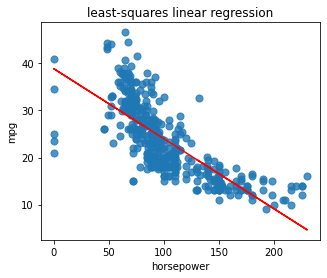

In [7]:
plt.figure(figsize = (5,4))
plt.scatter(X,y, marker = 'o',s =50, alpha = 0.8)
plt.plot(X, linreg.coef_*X+ linreg.intercept_,'r-')
plt.title('least-squares linear regression')
plt.xlabel('horsepower')
plt.ylabel('mpg')

## 9. Auto dataset

### a. produce a scatterplot matrix which includes all of the variables in the data set

<Figure size 432x288 with 0 Axes>

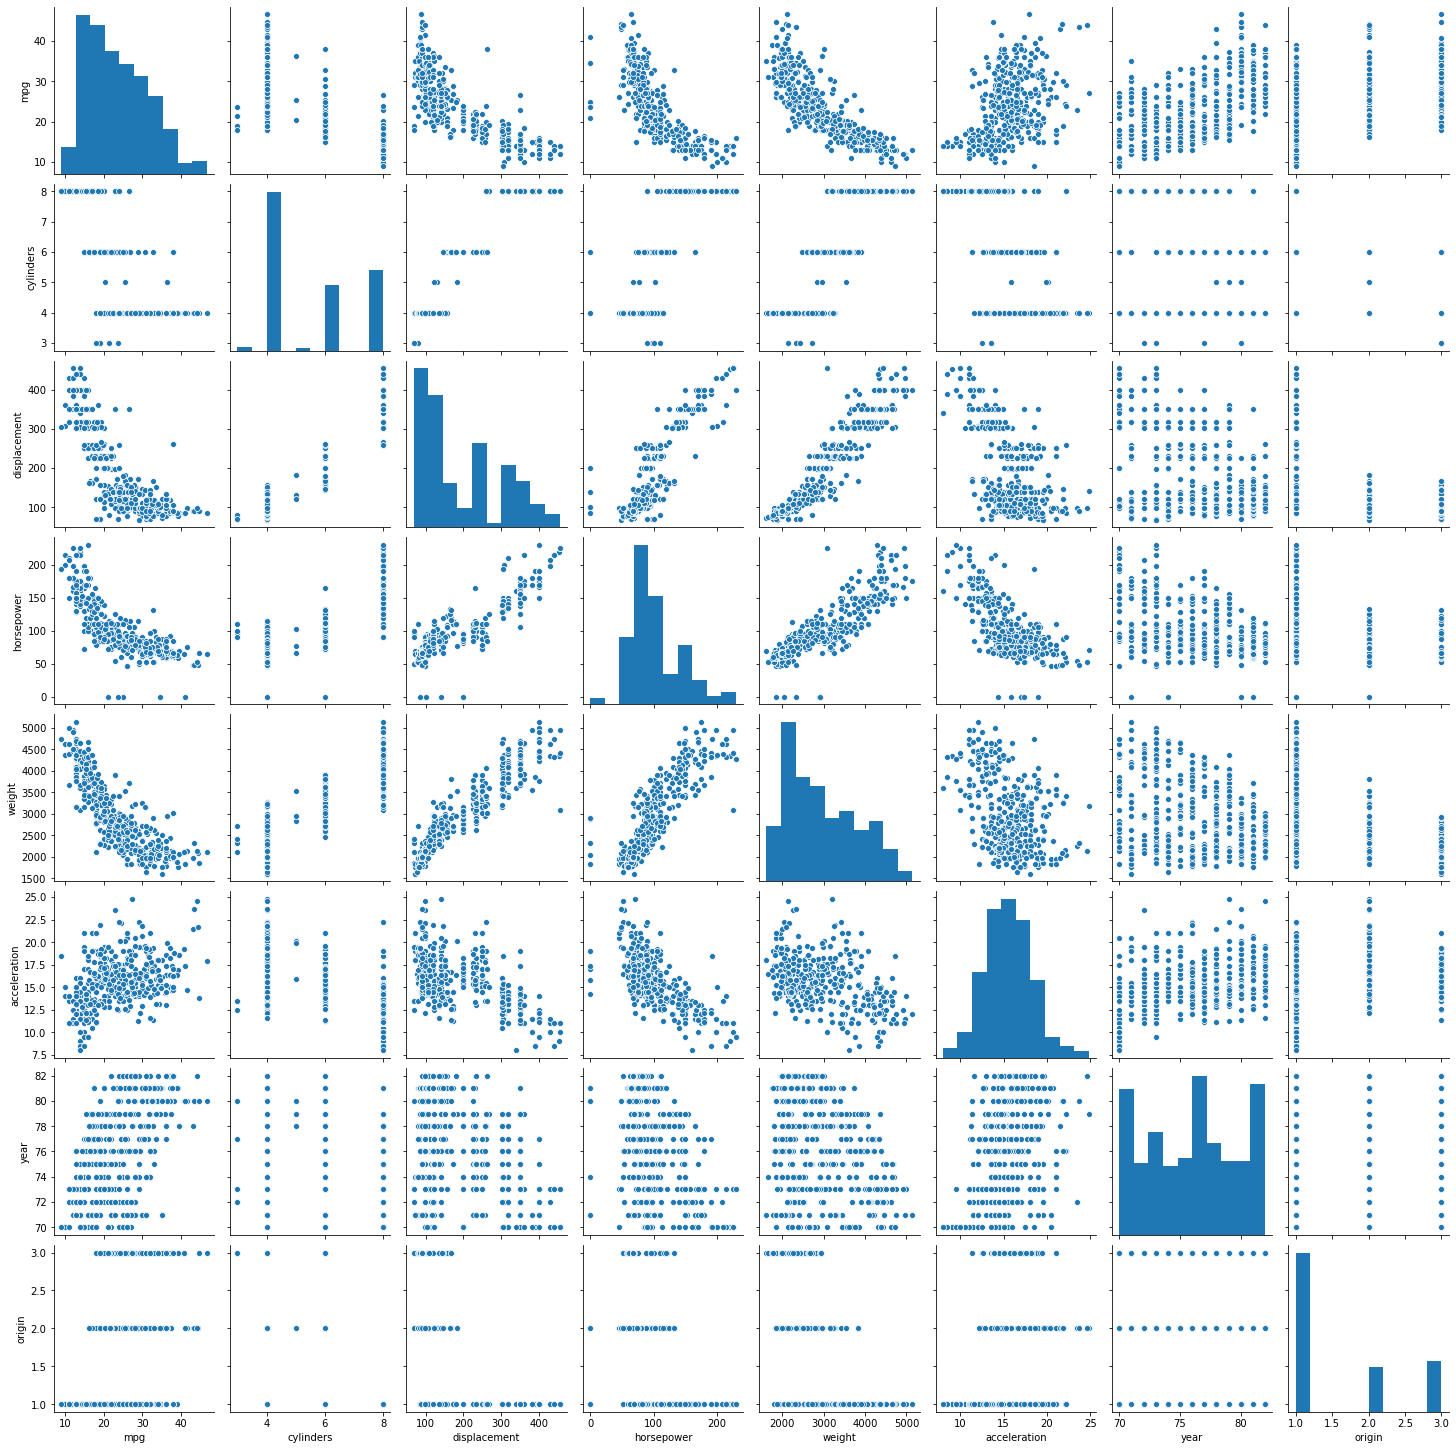

In [8]:
plt.figure()
sns.pairplot(auto)

### b. compute the matrix of correlatons between the variables, exclude the name variable. 

In [14]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.761004,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.823711,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.876741,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.761004,0.823711,0.876741,1.000000,0.845483,-0.670643,-0.405830,-0.427052
weight,-0.831739,0.897017,0.933104,0.845483,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.670643,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.405830,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.427052,-0.581265,0.210084,0.184314,1.000000


### c. perform a multiple linear regression with mpg as the response and all other variables excet name as predictors. 

In [15]:
Xm = auto[['cylinders','displacement', 'horsepower', 'weight', 'acceleration','year', 'origin']]
ym = auto.mpg.values

mlinreg = LinearRegression().fit(Xm,ym)
print('mutiple linear model coeff (w): {}'
     .format(mlinreg.coef_))
print('mutiple linear model intercept (b): {:.3f}'
     .format(mlinreg.intercept_))
print('mutiple R-squared score: {:.3f}'
     .format(mlinreg.score(Xm, ym)))

mutiple linear model coeff (w): [-0.46355027  0.01998357 -0.01493407 -0.00660405  0.09393201  0.7574413
  1.44569239]
mutiple linear model intercept (b): -17.964
mutiple R-squared score: 0.822


### d. produce diagnostic plots of the linear regressio fit. 

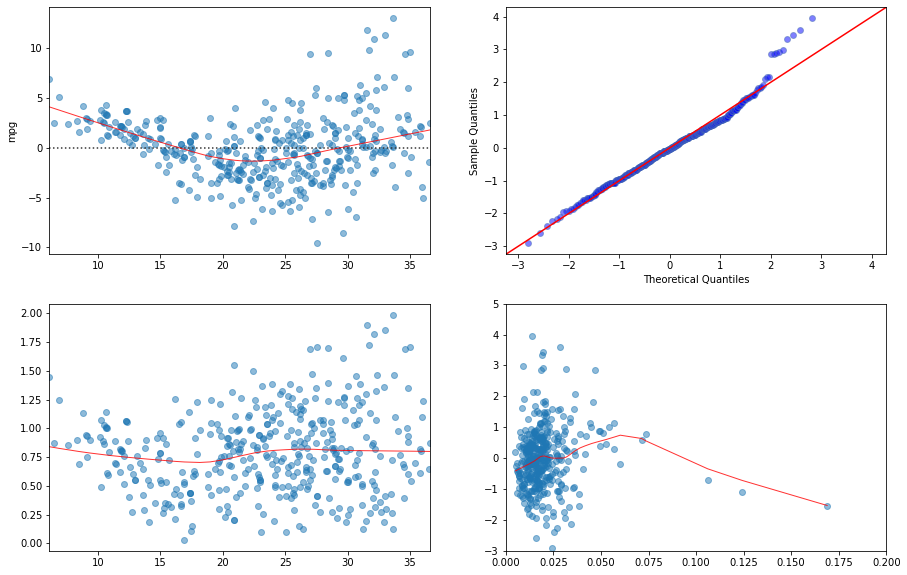

In [17]:
from scipy.stats import zscore
y_pred = mlinreg.predict(Xm)
f, axes = plt.subplots(2, 2, sharex=False, sharey=False) 
f.set_figheight(10)
f.set_figwidth(15)

# residual plot
sns.residplot(y_pred, 'mpg', data=auto, ax=axes[0, 0],  
              lowess=True, 
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}) # residual plot

# qq plot
form = 'mpg ~ cylinders+displacement+ horsepower+weight+acceleration+year+origin'
lm2_fit = smf.ols(formula=form, data=auto).fit()
lm2_norm_resid = zscore(lm2_fit.resid)
qq = ProbPlot(lm2_norm_resid)
qq.qqplot(ax=axes[0, 1], line='45', alpha=0.5, color='#4C72B0', lw=1)

# scale-location plot
lm2_norm_resid_abssq = np.sqrt(np.abs(lm2_norm_resid))

axes[1, 0].scatter(y_pred, lm2_norm_resid_abssq, alpha=0.5)
sns.regplot(y_pred, lm2_norm_resid_abssq, ax=axes[1, 0], scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# leverage plot
leverage = lm2_fit.get_influence().hat_matrix_diag
axes[1, 1].scatter(leverage, lm2_norm_resid, alpha=0.5)
sns.regplot(leverage, lm2_norm_resid, ax=axes[1, 1], scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
axes[1, 1].set_xlim(0, 0.20);
axes[1, 1].set_ylim(-3, 5);


### e. fit the linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [19]:
lm3_fit = smf.ols(formula=form + ' + horsepower:weight + displacement:acceleration', data=auto).fit()

lm3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     265.8
Date:                Wed, 09 Sep 2020   Prob (F-statistic):          1.12e-159
Time:                        14:06:02   Log-Likelihood:                -988.27
No. Observations:                 397   AIC:                             1997.
Df Residuals:                     387   BIC:                             2036.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -12.1044      5.162     -2.345      0.020     -22.253      -1.956
cylinders                     0.1316      0.294      0.448      0.654      -0.446       0.709
displacement                  0.0253      0.011      2.409      0.016       0.005       0.046
horsepower                   -0.1638      0.020     -8.180      0.000      -0.203      -0.124
weight                       -0.0097      0.001    -10.737      0.000      -0.012      -0.008
acceleration                  0.3385      0.138      2.447      0.015       0.066       0.610
year                          0.8005      0.045     17.873      0.000       0.712       0.889
origin                        0.8038      0.254      3.167      0.002       0.305       1.303
horsepower:weight          4.117e-05   5.56e-06      7.402      0.000    3.02e-05    5.21e-05
displacement:acceleration    -0.0019      0.001     -2.621      0.009      -0.003      -0.000
==============================================================================
Omnibus:                       35.281   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.408
Skew:                           0.556   Prob(JB):                     4.63e-14
Kurtosis:                       4.573   Cond. No.                     1.40e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### f. Try a few different transformations of the variables. comment on your findings.

In [20]:
lm4_fit = smf.ols(formula='mpg ~ np.log(cylinders) + displacement + horsepower + \
                           np.power(horsepower,2) + weight + acceleration + year + origin', 
                  data=auto).fit()

lm4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     249.1
Date:                Wed, 09 Sep 2020   Prob (F-statistic):          1.03e-147
Time:                        14:07:04   Log-Likelihood:                -1019.5
No. Observations:                 397   AIC:                             2057.
Df Residuals:                     388   BIC:                             2093.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -14.2265      4.571     -3.112      0.002     -23.213      -5.240
np.log(cylinders)          -0.9534      1.709     -0.558      0.577      -4.313       2.406
displacement                0.0060      0.008      0.785      0.433      -0.009       0.021
horsepower                 -0.1123      0.020     -5.625      0.000      -0.151      -0.073
np.power(horsepower, 2)     0.0004   7.58e-05      5.680      0.000       0.000       0.001
weight                     -0.0059      0.001     -9.585      0.000      -0.007      -0.005
acceleration                0.0664      0.088      0.755      0.451      -0.106       0.239
year                        0.7761      0.048     16.082      0.000       0.681       0.871
origin                      1.2016      0.268      4.485      0.000       0.675       1.728
==============================================================================
Omnibus:                       25.774   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.767
Skew:                           0.411   Prob(JB):                     1.15e-10
Kurtosis:                       4.446   Cond. No.                     4.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""